In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv('Online Retail.csv', encoding='ISO-8859-1')

In [38]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09/12/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09/12/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09/12/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09/12/2011 12:50,4.15,12680.0,France


In [39]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [41]:
df.CustomerID.dtype

dtype('float64')

In [42]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [43]:
df.duplicated().sum()

np.int64(5268)

In [44]:
df = df.drop_duplicates()

In [45]:
df = df.dropna(subset=['Description'])

In [46]:
df = df.dropna(subset=['CustomerID'])

In [47]:
df['CustomerID']

0         17850.0
1         17850.0
2         17850.0
3         17850.0
4         17850.0
           ...   
541904    12680.0
541905    12680.0
541906    12680.0
541907    12680.0
541908    12680.0
Name: CustomerID, Length: 401604, dtype: float64

In [48]:
df['CustomerID'] = df['CustomerID'].astype(int)

In [49]:
df['CustomerID'] = df['CustomerID'].astype(str)

In [50]:
df = df.drop(df[df['Quantity'] <= 0].index, axis=0)

In [51]:
df = df.drop(df[df['UnitPrice'] <= 0].index, axis=0)

In [52]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst=True)

In [53]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [54]:
df[df['CustomerID'].isnull()]['Country'].value_counts()

Series([], Name: count, dtype: int64)

In [55]:
reference_date = df['InvoiceDate'].max()
reference_date

Timestamp('2011-12-09 12:50:00')

In [56]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  
    'InvoiceNo': 'count',  
    'TotalPrice': 'sum' 
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']


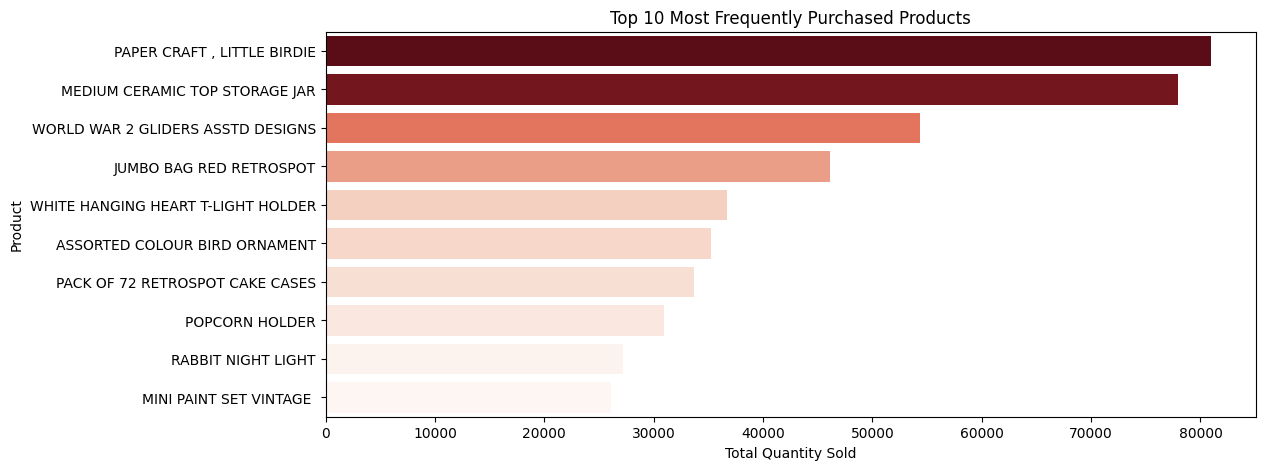

In [57]:
most_bought_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

most_bought_products = most_bought_products.reset_index()

plt.figure(figsize=(12,5))
sns.barplot(data=most_bought_products, x='Quantity', y='Description', hue='Quantity', palette='Reds', legend=False)
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product')
plt.title('Top 10 Most Frequently Purchased Products')
plt.show()


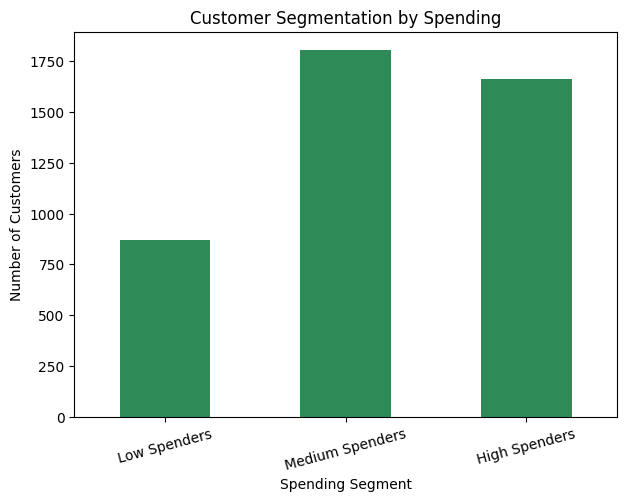

In [58]:

total_spending = df.groupby('CustomerID')['TotalPrice'].sum()

def categorize_spending(amount):
    if amount > 1000:
        return 'High Spenders'
    elif amount > 250:
        return 'Medium Spenders'
    else:
        return 'Low Spenders'

spending_segments = total_spending.apply(categorize_spending).value_counts()


ordered_categories = ['Low Spenders', 'Medium Spenders', 'High Spenders']
spending_counts = spending_segments.reindex(ordered_categories, fill_value=0)


plt.figure(figsize=(7, 5))
spending_counts.plot(kind='bar', color='seagreen')
plt.xlabel('Spending Segment')
plt.ylabel('Number of Customers')
plt.title('Customer Segmentation by Spending')
plt.xticks(rotation=15)
plt.show()


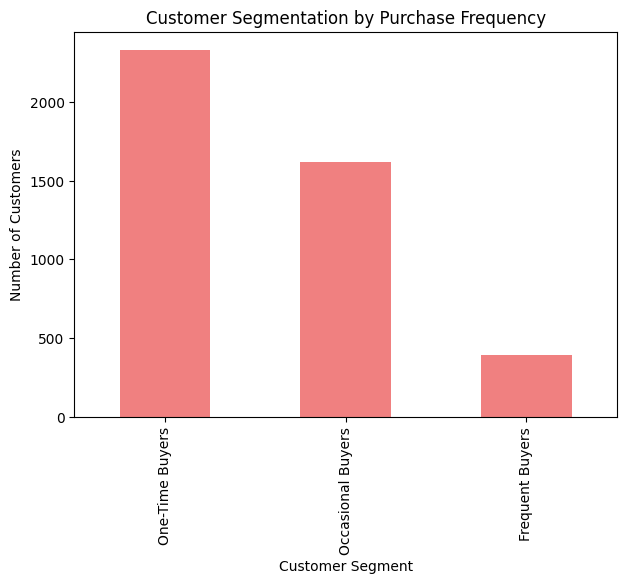

In [59]:
# Count orders per customer
purchase_counts = df.groupby('CustomerID')['InvoiceNo'].nunique()

# Categorize customers
def categorize_purchases(count):
    if count >= 10:
        return 'Frequent Buyers'
    elif count >= 3:
        return 'Occasional Buyers'
    else:
        return 'One-Time Buyers'

customer_segments = purchase_counts.apply(categorize_purchases)

# **Plot Distribution**
plt.figure(figsize=(7, 5))
customer_segments.value_counts().plot(kind='bar', color='lightcoral')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.title('Customer Segmentation by Purchase Frequency')
plt.show()


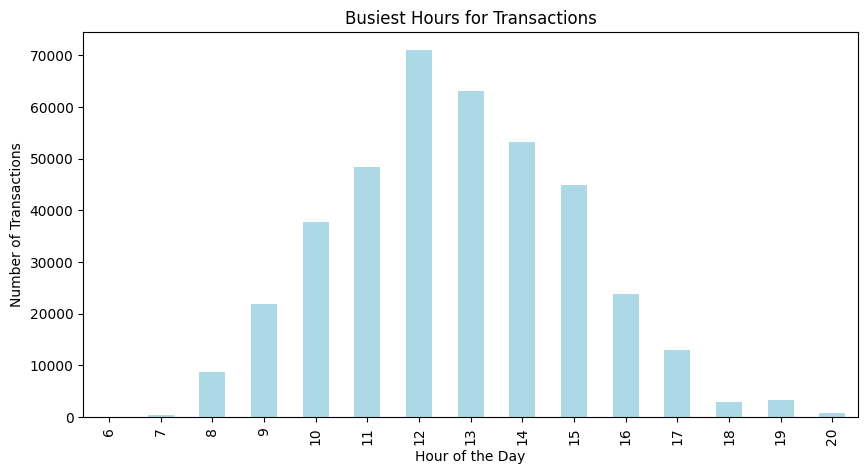

In [60]:
busy_hour = df['InvoiceDate'].dt.hour.value_counts().reset_index().sort_values('InvoiceDate')
busy_hour.rename(columns={'count': 'Number of Transactions'}, inplace=True)

busy_hour.plot(kind='bar',
                    x='InvoiceDate',
                    y='Number of Transactions',
                    legend=False,  
                    color='lightblue',
                    figsize=(10,5))

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.title('Busiest Hours for Transactions')
plt.show()

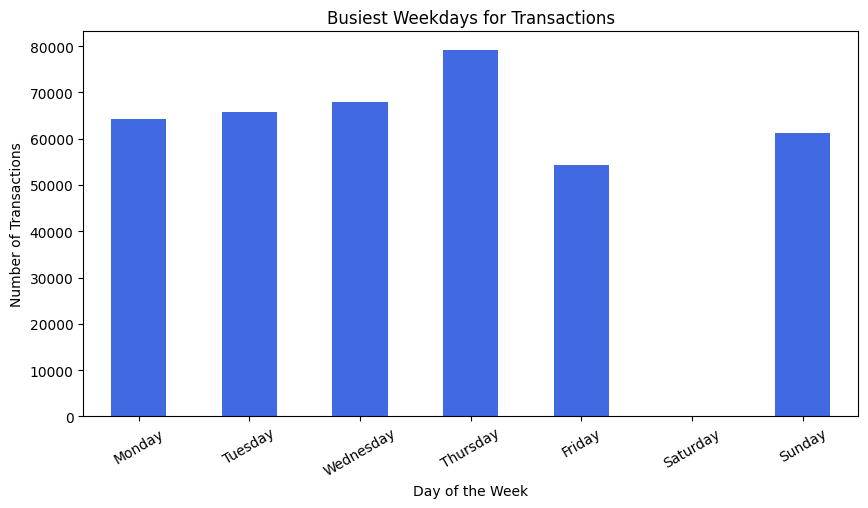

In [69]:
df['Weekday'] = df['InvoiceDate'].dt.day_name()

busy_weekday = df['Weekday'].value_counts().reset_index()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
busy_weekday = busy_weekday.set_index('Weekday').reindex(weekday_order).reset_index()

busy_weekday.plot(kind='bar',
                    x='Weekday',
                    legend=False,  
                    color='royalblue',
                    figsize=(10,5))


plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.title('Busiest Weekdays for Transactions')
plt.xticks(rotation=30)
plt.show()


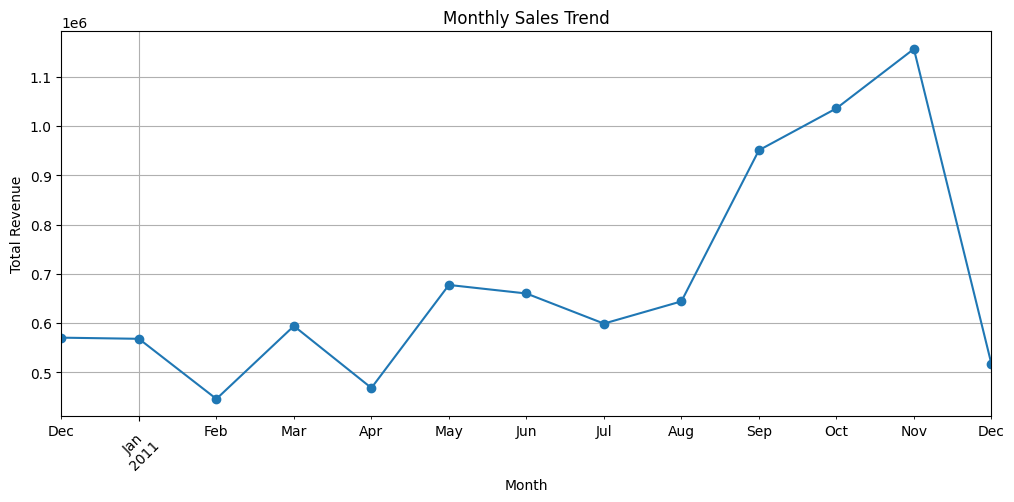

In [62]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')

monthly_sales = df.groupby('Month')['TotalPrice'].sum()

plt.figure(figsize=(12, 5))
monthly_sales.plot(marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.grid()
plt.show()


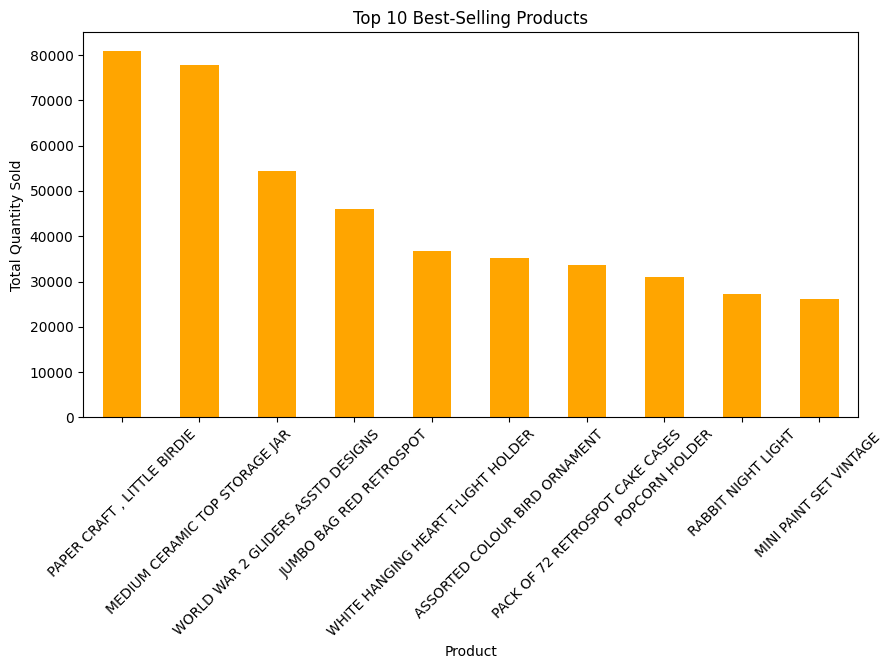

In [63]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
top_products.plot(kind='bar', color='orange')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.title('Top 10 Best-Selling Products')
plt.xticks(rotation=45)
plt.show()


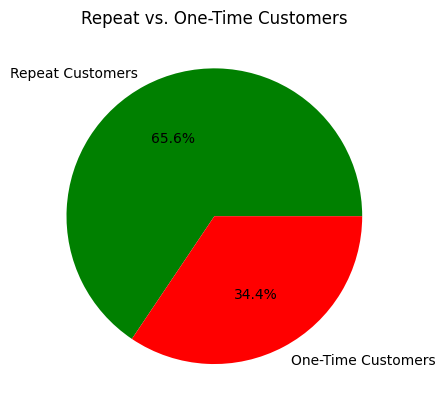

In [64]:
customer_orders = df.groupby('CustomerID')['InvoiceNo'].nunique()
repeat_customers = (customer_orders > 1).sum()
one_time_customers = (customer_orders == 1).sum()

plt.pie([repeat_customers, one_time_customers], labels=['Repeat Customers', 'One-Time Customers'], autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Repeat vs. One-Time Customers')
plt.show()


C:\Users\ryang\AppData\Local\Temp\ipykernel_6520\1641536238.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='Blues_r')


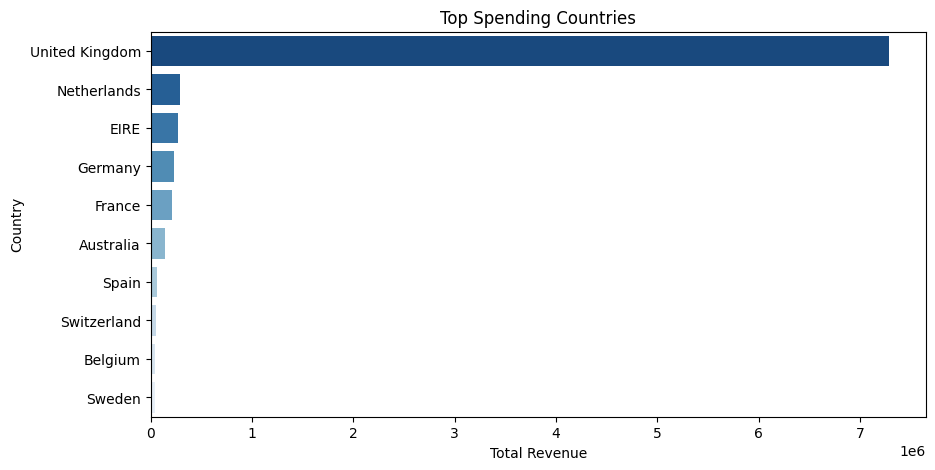

In [67]:
top_countries = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='Blues_r')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.title('Top Spending Countries')
plt.show()
